In [1]:
import numpy as np
import awkward as ak
import fastjet
import uproot as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
generator="P8H"
with open('JetDFs/{}Gen.pickle'.format(generator), 'rb') as handle:
    gen_dict = pickle.load(handle)
with open('JetDFs/{}Reco.pickle'.format(generator), 'rb') as handle:
    reco_dict = pickle.load(handle)
lowerRange = 20 
upperRange = 70
width = 5

EtaLower = 2.5
EtaUpper = 3.5
EtaWidth = 0.2

events = len(reco_dict["energy"])
print(events)

5000000


In [3]:
print(len(ak.flatten(reco_dict["energy"])))
print(len(ak.flatten(gen_dict["energy"])))

3736592
3078909


Text(0.5, 1.0, 'P8H Full Sim')

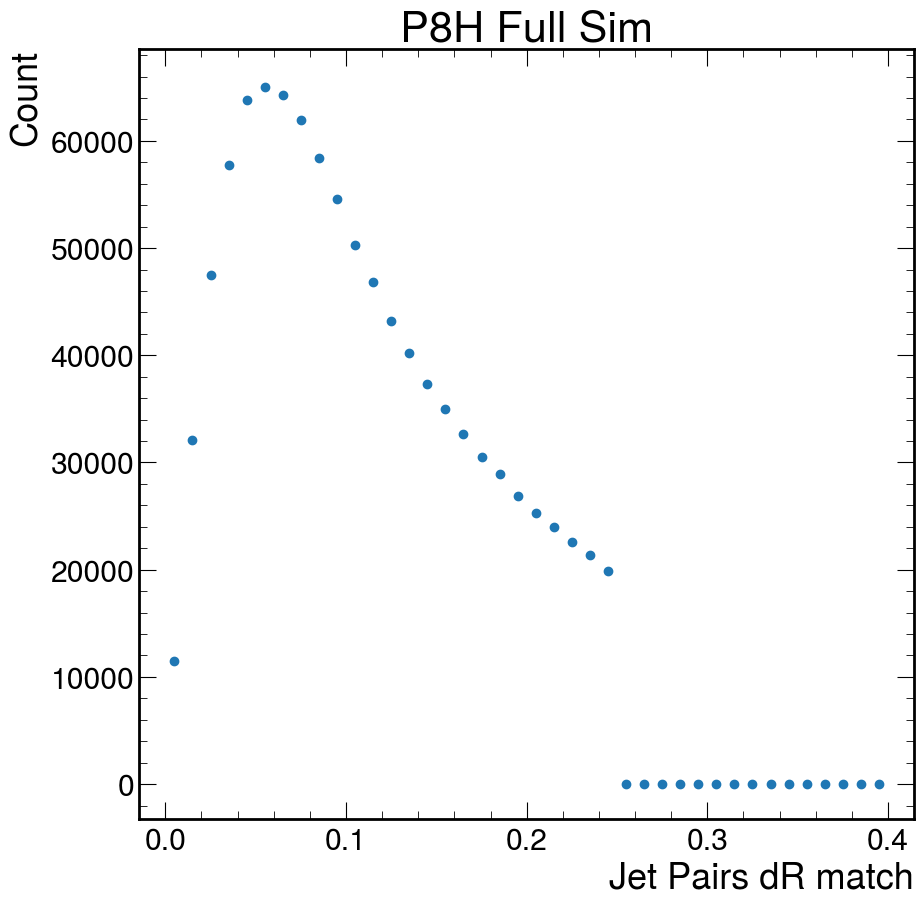

In [4]:
hist, bin_edges = np.histogram(ak.flatten(reco_dict['dR_new']),bins = 40, range=(0,0.4))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Jet Pairs dR match')
plt.ylabel('Count')
plt.title("{} Full Sim".format(generator))

In [5]:
mask = (ak.flatten(reco_dict["matched_index_new"]) > -1)
matchedJetE = ak.flatten(reco_dict["energy"])[mask]
matchedJetEta = ak.flatten(reco_dict["eta"])[mask]
matchedJetPhi = ak.flatten(reco_dict["phi"])[mask]
#phiMask = (matchedJetPhi > -0.4) & (matchedJetPhi < 0.4)
#matchedJetE = matchedJetE[phiMask]


mask = (ak.flatten(gen_dict["matched_index_new"]) > -1)
matchedGjetE = ak.flatten(gen_dict["energy"])[mask]
matchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
matchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]
#matchedGjetE = matchedGjetE[phiMask]

mask = ak.flatten(reco_dict["matched_index_new"]) == -1
unmatchedJetE = ak.flatten(reco_dict["energy"])[mask]
unmatchedJetEta = ak.flatten(reco_dict["eta"])[mask]
unmatchedJetPhi = ak.flatten(reco_dict["phi"])[mask]

mask = ak.flatten(gen_dict["matched_index_new"]) == -1
unmatchedGjetE = ak.flatten(gen_dict["energy"])[mask]
unmatchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
unmatchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]

In [6]:
PairedGenE = matchedGjetE
PairedRecoE = matchedJetE
JetR = PairedRecoE/PairedGenE

/home/sean/miniconda3/envs/test-env/lib/python3.11/site-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


Text(0, 1, 'Ratio')

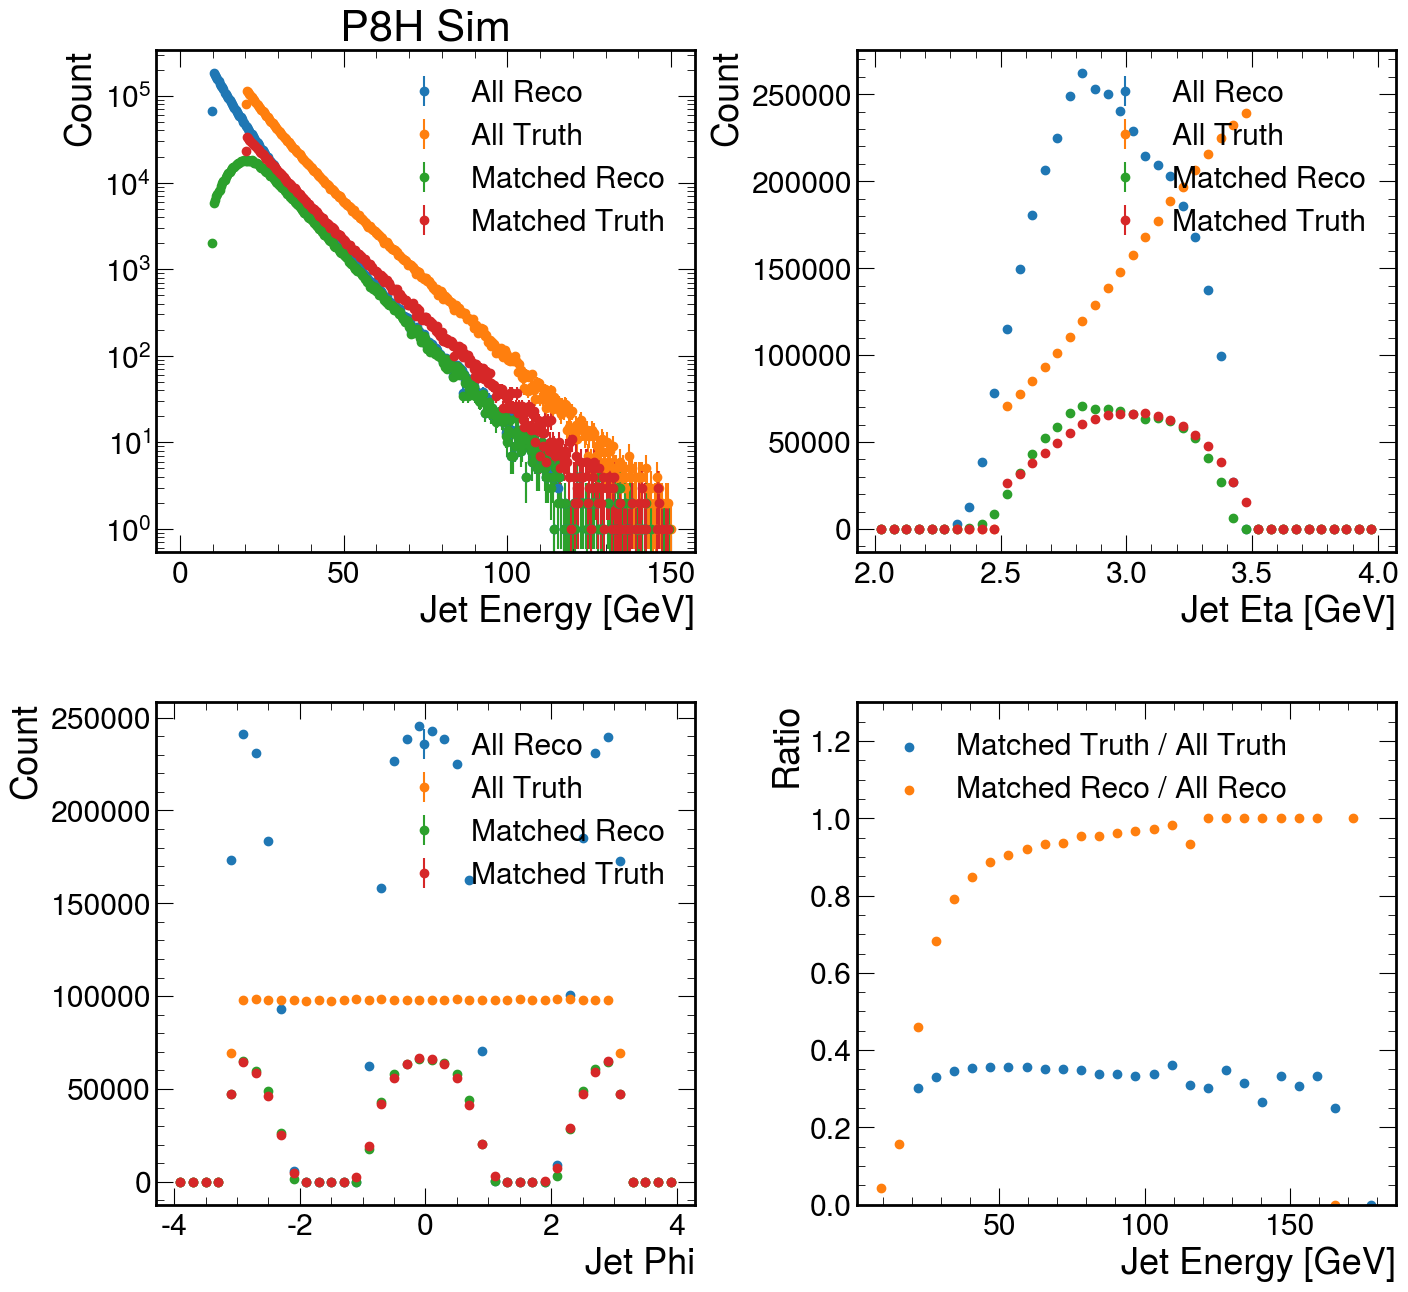

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 15), gridspec_kw={'wspace': 0.3,'hspace': 0.3})

plt.sca(axs[0][0])
events=1

hist, bin_edges = np.histogram(ak.flatten(reco_dict["energy"]),range=(0,150),bins=400)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,150),bins=400)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetE,range=(0,150),bins=400)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetE,range=(0,150),bins=400)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")

plt.legend()


plt.yscale("log")
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Count')
plt.title("{} Sim".format(generator))

plt.sca(axs[0][1])


hist, bin_edges = np.histogram(ak.flatten(reco_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetEta,range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetEta,range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")



plt.legend(loc='upper right')
#plt.ylim(0,0.1)


plt.xlabel('Jet Eta [GeV]')
plt.ylabel('Count')



plt.sca(axs[1][0])



hist, bin_edges = np.histogram(ak.flatten(reco_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="All Truth")

hist, bin_edges = np.histogram(matchedJetPhi,range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Reco")

hist, bin_edges = np.histogram(matchedGjetPhi,range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist)/events,yerr=np.sqrt(hist)/events,fmt="o", label="Matched Truth")

plt.legend(loc="upper right")
#plt.ylim(0,0.1)

plt.xlabel('Jet Phi')
plt.ylabel('Count')




plt.sca(axs[1][1])
hist2, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,250),bins=40)

hist1, bin_edges = np.histogram(matchedGjetE,bins = 40, range=(0,250))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2


plt.scatter(np.array(bin_centres),np.array(hist1/hist2),marker="o", label="Matched Truth / All Truth")


hist2, bin_edges = np.histogram(ak.flatten(reco_dict["energy"]),range=(0,250),bins=40)

hist1, bin_edges = np.histogram(matchedJetE,range=(0,250),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2


plt.scatter(np.array(bin_centres),np.array(hist1/hist2),marker="o", label="Matched Reco / All Reco")


plt.legend(loc="upper left")
plt.ylim(0,1.3)
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Ratio')

In [8]:
for eta in np.arange(3.5,4.1,0.1):
    print(eta)

3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0


In [9]:
def gauss(x, A, mu, sigma):
    #A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((hist - y)**2)
    
AvgEReco = []
AvgERecoErr = []
NumEReco = []
NumERecoErr = []
GenSlice = []
EtaSlice = []

for eta in np.arange(EtaLower,EtaUpper,EtaWidth):
    
    EBin = 0
    for i in range(lowerRange,upperRange,width):
  
        genEBin = (PairedGenE > (i)) & (PairedGenE < (i+width)) & (matchedJetEta > eta) & (matchedJetEta < eta + (EtaWidth))
    
        hist, bin_edges = np.histogram(PairedRecoE[genEBin],bins=50,range=(0,100))
    
        zerocut = (hist > 0)
        total = np.sum(hist[zerocut])
        errs = np.sqrt(hist[zerocut]) / total
        hist = hist[zerocut] / total
    
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        bins = bin_centres[zerocut]
    
        minFit = bins[np.argmax(hist)] - 10
        maxFit = bins[np.argmax(hist)] + 10
        minFit = np.mean(PairedRecoE[genEBin]) - 1.5 * np.std(PairedRecoE[genEBin])
        maxFit = np.mean(PairedRecoE[genEBin]) + 1.5 * np.std(PairedRecoE[genEBin])

        fitCut = (bins > minFit) & (bins < maxFit)

    
    
        GenSlice.append(i+(width/2))
        EtaSlice.append(eta+(EtaWidth/2))
       
        least_squares = LeastSquares(list(bins[fitCut]),list(hist[fitCut]),list(errs[fitCut]),gauss)
        m = Minuit(least_squares, A=max(hist), mu = np.mean(PairedRecoE[genEBin]), sigma = np.std(PairedRecoE[genEBin]))
        m.limits["mu"] = (minFit, maxFit)
        m.migrad()
        m.hesse()
   
        fitPlotCut = (np.linspace(0,150,5000) > minFit) & (np.linspace(0,150,5000) < maxFit)
        hist_fit = gauss(np.linspace(0,150,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
 
    
        NumEReco.append(np.mean(PairedRecoE[genEBin]))
        NumERecoErr.append(np.std(PairedRecoE[genEBin]))

        if not math.isnan(m.values[1]) :
            AvgEReco.append(m.values[1])
            AvgERecoErr.append(m.errors[1])
        else:
            AvgEReco.append(0)
            AvgERecoErr.append(0)

In [10]:
AvgR = []
AvgRErr = []

NumR = []
NumRErr = []

Res = []
ResErr = []

Sigma = []
SigmaErr = []
for eta in np.arange(2.5,3.5,0.2):
    EBin = 0
    for i in range(lowerRange,upperRange,width):

        
        genEBin = (PairedGenE > i) & (PairedGenE < i+width) & (matchedJetEta > eta) & (matchedJetEta < eta + 0.2)
    
        hist, bin_edges = np.histogram(JetR[genEBin],bins=50,range=(0,2))
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        bins = bin_centres
    
        zerocut = (hist > 0)
        total = np.sum(hist[zerocut])
        errs = np.sqrt(hist[zerocut]) / total
        hist = hist[zerocut] / total
    
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        bins = bin_centres[zerocut]
    


        minFit = bins[np.argmax(hist)] - 0.3
        maxFit = bins[np.argmax(hist)] + 0.3

        minFit = np.mean(JetR[genEBin]) - 1.5 * np.std(JetR[genEBin])
        maxFit = np.mean(JetR[genEBin]) + 1.5 * np.std(JetR[genEBin])
 
        fitCut = (bins > minFit) & (bins < maxFit)
    
    
        least_squares = LeastSquares(np.array(bins[fitCut]),np.array(hist[fitCut]),np.array(errs[fitCut]),gauss)
    
        m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    
        m.migrad()
        m.hesse()
    
        fitPlotCut = (np.linspace(0,2,5000) > minFit) & (np.linspace(0,2,5000) < maxFit)
        hist_fit = gauss(np.linspace(0,2,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])

    
        NumR.append(np.mean(PairedRecoE[genEBin]/PairedGenE[genEBin]))
        NumRErr.append(np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))

        if (not math.isnan(m.values[1])):
            AvgR.append(m.values[1])
            Res.append(np.abs(m.values[2]) / m.values[1])

            ResErr.append(m.errors[2] / m.values[1])

            Sigma.append(np.abs(m.values[2]))

            SigmaErr.append(m.errors[2])

        
        
            AvgRErr.append(m.errors[1])

        else:
            AvgR.append(0)
            AvgRErr.append(0)



2.6
3.0000000000000004
2.8000000000000003
3.2000000000000006
3.400000000000001


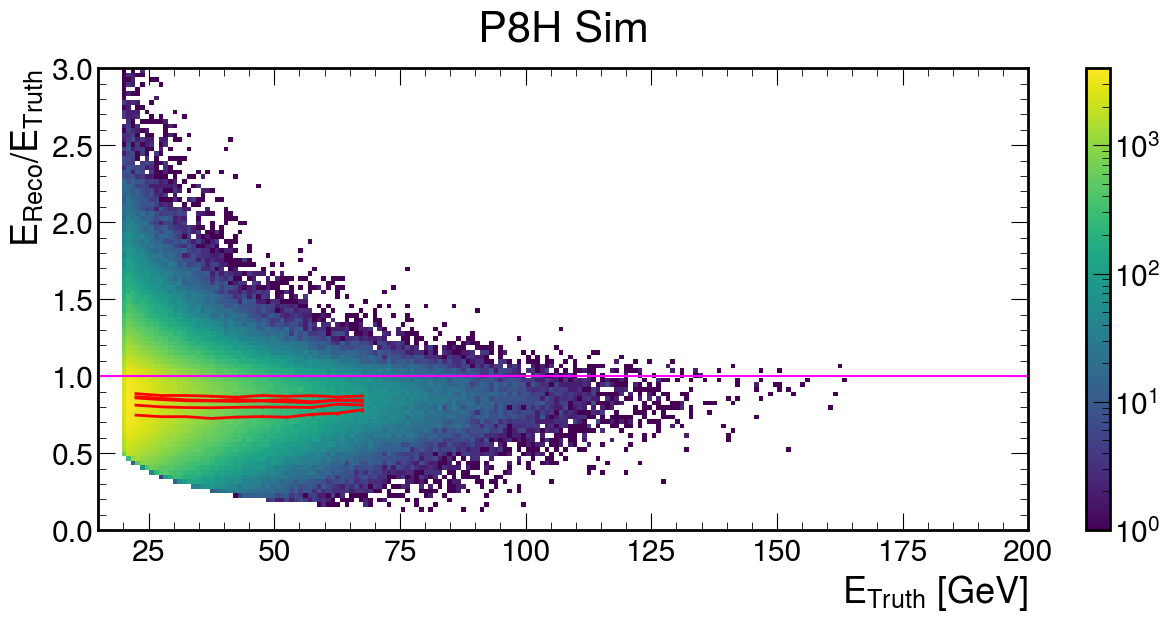

In [11]:

fig = plt.figure(figsize=(15,6))
plt.hist2d(np.array(PairedGenE),np.array(JetR),bins=(200,100),range=([15,200],[0,3]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
for i in set(EtaSlice):  
    print(i)
    mask = (np.array(EtaSlice) == i)
    plt.errorbar(np.array(GenSlice)[mask], np.array(AvgR)[mask], yerr=np.array(AvgRErr)[mask],color='red',label="Gauss Mean",linewidth=2)
plt.plot(np.linspace(0,200,1000),np.ones(1000),color='magenta')

plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel(r'$E_{Reco}$/$E_{Truth}$')
plt.title("{} Sim".format(generator),pad = 20.0)
plt.show()

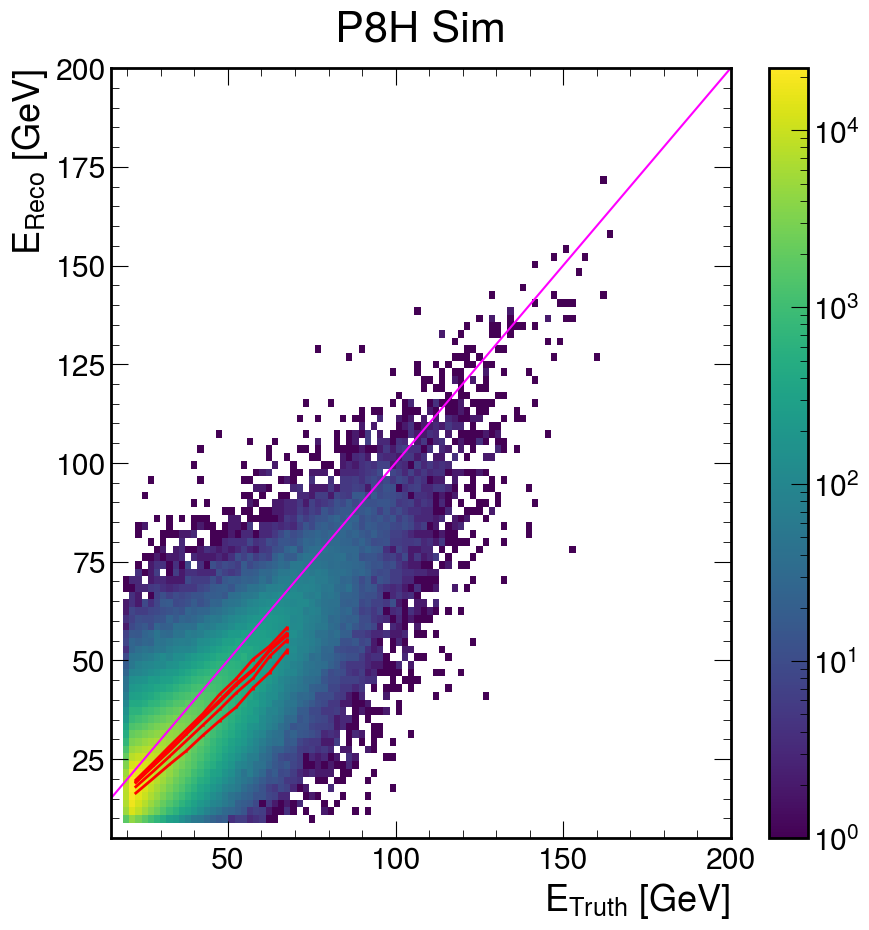

In [12]:
EtaMask = (matchedJetEta > eta) & (matchedJetEta < eta + 0.5)

plt.hist2d(np.array(PairedGenE),np.array(PairedRecoE),bins=(100,100),range=([15,200],[5,200]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()

for i in set(EtaSlice):  
    mask = (np.array(EtaSlice) == i)
    plt.errorbar(np.array(GenSlice)[mask], np.array(AvgEReco)[mask], yerr=np.array(AvgERecoErr)[mask],color='red',label="Gauss Mean",linewidth=2)

plt.plot(np.linspace(0,200,1000),np.linspace(0,200,1000),color='magenta')

plt.xlabel(r'$E_{Truth}$ [GeV]')
plt.ylabel(r'$E_{Reco}$ [GeV]')
plt.title("{} Sim".format(generator),pad = 20.0)
plt.show()

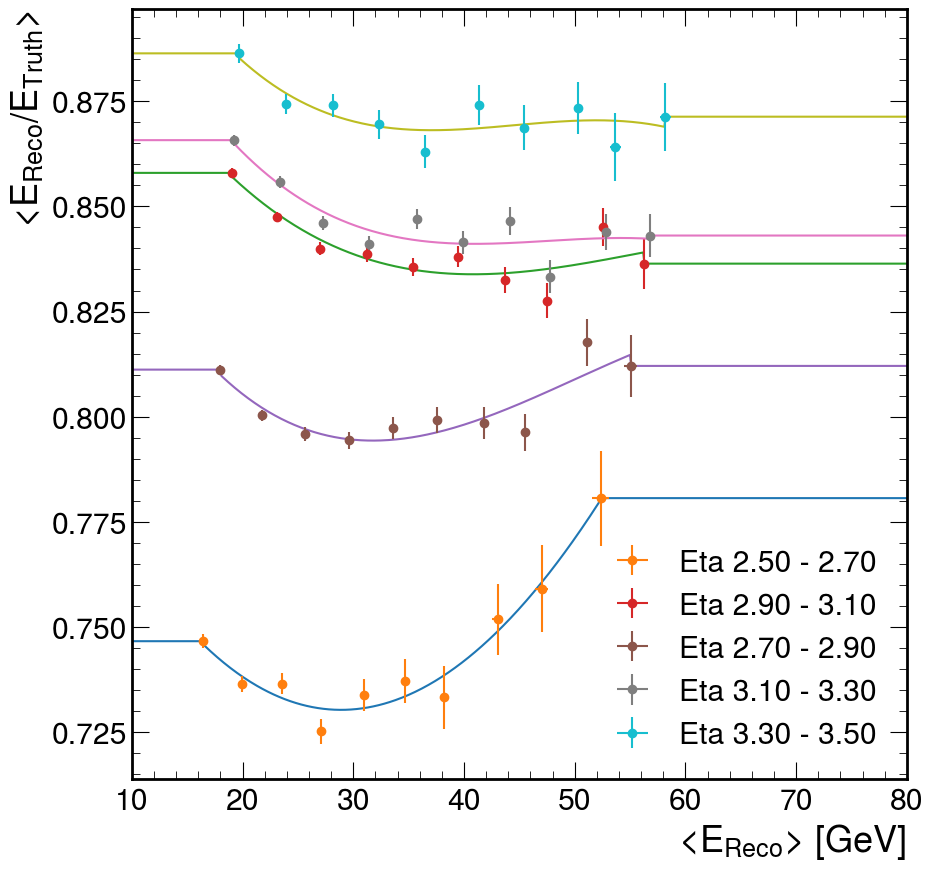

In [15]:
from scipy.interpolate import UnivariateSpline
    
def custom_spline(x):
    if isinstance(x, (list, np.ndarray)):
        return np.array([custom_spline(xi) for xi in x])
    if x <= np.array(AvgEReco)[mask][-1] and x >= np.array(AvgEReco)[mask][0]:
        return spl(x)
    elif x >= np.array(AvgEReco)[mask][-1]:
        return np.array(AvgR)[mask][-1]
    else:
        return np.array(AvgR)[mask][0]

for i in set(EtaSlice): 
    mask = (np.array(EtaSlice) == i)
    spl = UnivariateSpline(np.array(AvgEReco)[mask], np.array(AvgR)[mask], k=3, s=0.1)
    xnew = np.linspace(0, 100, num=1001)
    plt.plot(xnew,custom_spline(xnew))
    plt.errorbar(np.array(AvgEReco)[mask],np.array(AvgR)[mask],xerr=np.array(AvgERecoErr)[mask],yerr=np.array(AvgRErr)[mask],fmt="o",label="Eta %2.2f - %2.2f"%(i-(EtaWidth/2), i + (EtaWidth/2)))
    

plt.xlim(10,80)
plt.ylabel(r"<$E_{Reco}$/$E_{Truth}$>")
plt.xlabel(r"<$E_{Reco}$> [GeV]")
plt.legend()

with open('Scale2D_{}.pickle'.format(generator), 'wb') as f:
    pickle.dump((EtaSlice, AvgEReco, AvgERecoErr, AvgR, AvgRErr),  f)